In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [33]:
data_src = "./solar_data_cleaned_updated.csv"
data_df = pd.read_csv(data_src, index_col = 0)

In [34]:
print(data_df.columns)

Index(['DateTime', 'local_datetime', 'Temperature', 'Alpha', 'AOD',
       'Asymmetry', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Dew Point', 'DHI', 'DNI', 'GHI', 'Ozone', 'Relative Humidity',
       'Solar Zenith Angle', 'SSA', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Kcs'],
      dtype='object')


count    23187.000000
mean       437.955320
std        279.367254
min          3.000000
25%        190.000000
50%        413.000000
75%        662.000000
max        999.000000
Name: GHI, dtype: float64
Kurtosis of normal distribution (should be 0): -1.0888275561190437
Skewness of normal distribution (should be 0): 0.26250311748714705


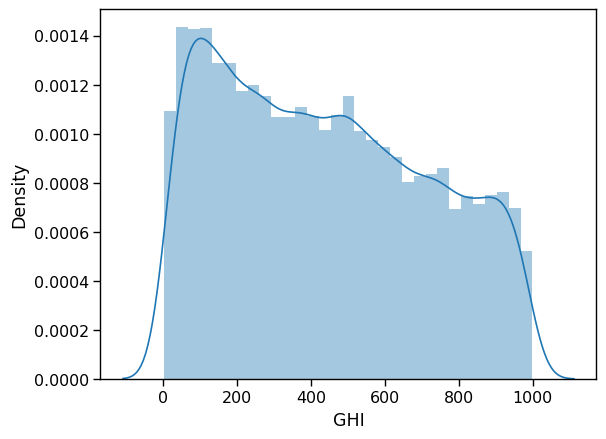

In [35]:
print(data_df.GHI.describe())

sns.distplot(data_df.GHI);

stats.normaltest(data_df.GHI)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(data_df.GHI)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(data_df.GHI)))

KURTOSIS: describes heaviness of the tails of a distribution

Normal Distribution has a kurtosis of 0 (mesokurtic) A positive value tells you that you have heavy-tails (i.e. a lot of data in your tails). A negative value means that you have light-tails (i.e. little data in your tails).

SKEWNESS:

If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.


In [36]:
df_time_ghi = data_df.loc[:,['local_datetime','GHI']]
df_time_ghi.set_index('local_datetime',inplace=True);

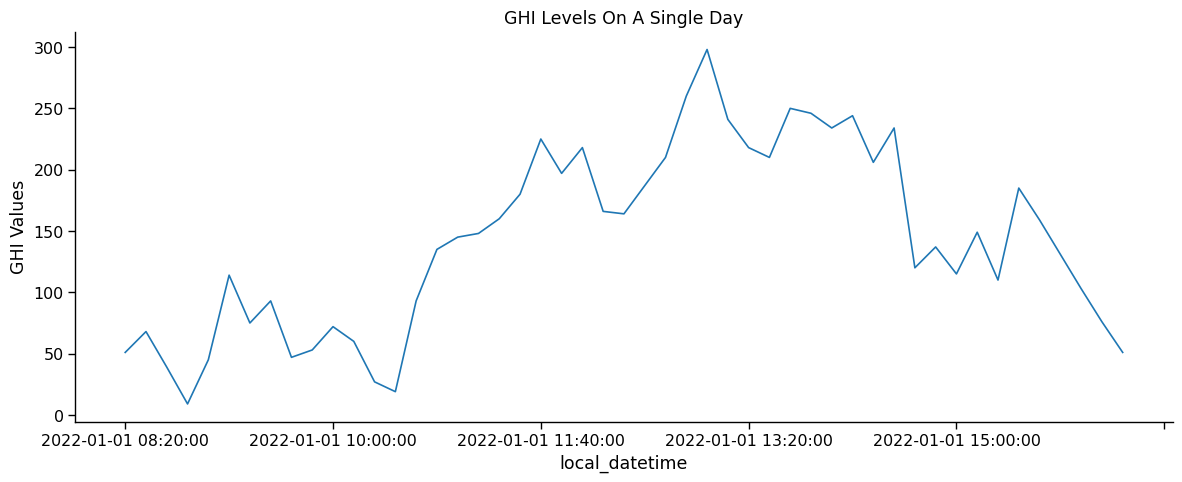

In [37]:
temp_ghi_start = '2022-01-01 00:00:00'
temp_ghi_end = '2022-01-01 23:59:59'
df_temp = df_time_ghi[(df_time_ghi.index >= temp_ghi_start ) & (df_time_ghi.index < temp_ghi_end)]  

df_temp.plot(figsize=(12,5));
plt.title('GHI Levels On A Single Day')
plt.ylabel('GHI Values')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show()

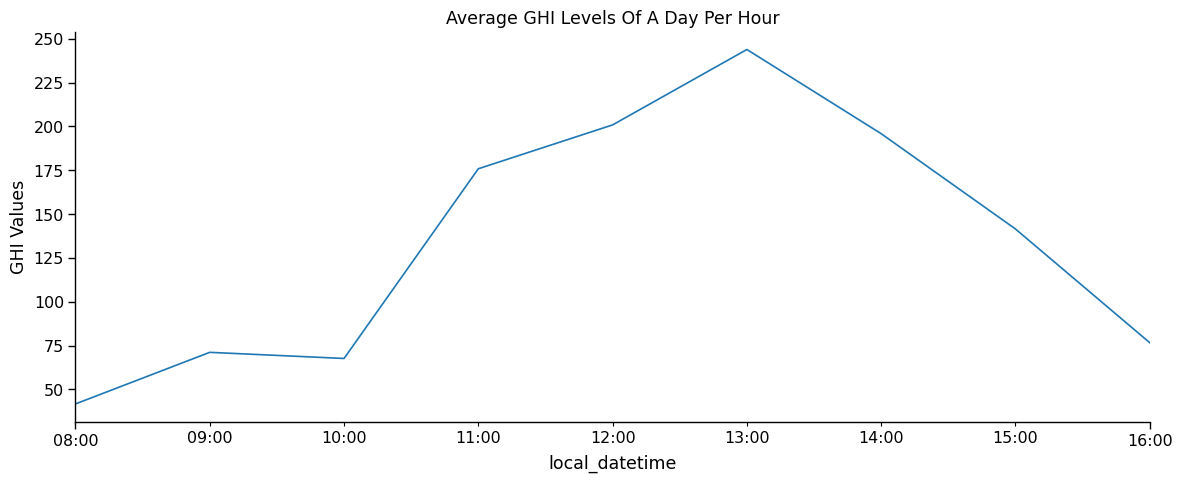

In [56]:
df_temp.index = pd.to_datetime(df_temp.index)
df_temp_resampled = df_temp.resample('H').mean()
df_temp_resampled.plot(figsize=(12,5));
plt.title('Average GHI Levels Of A Day Per Hour')
plt.ylabel('GHI Values')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show()

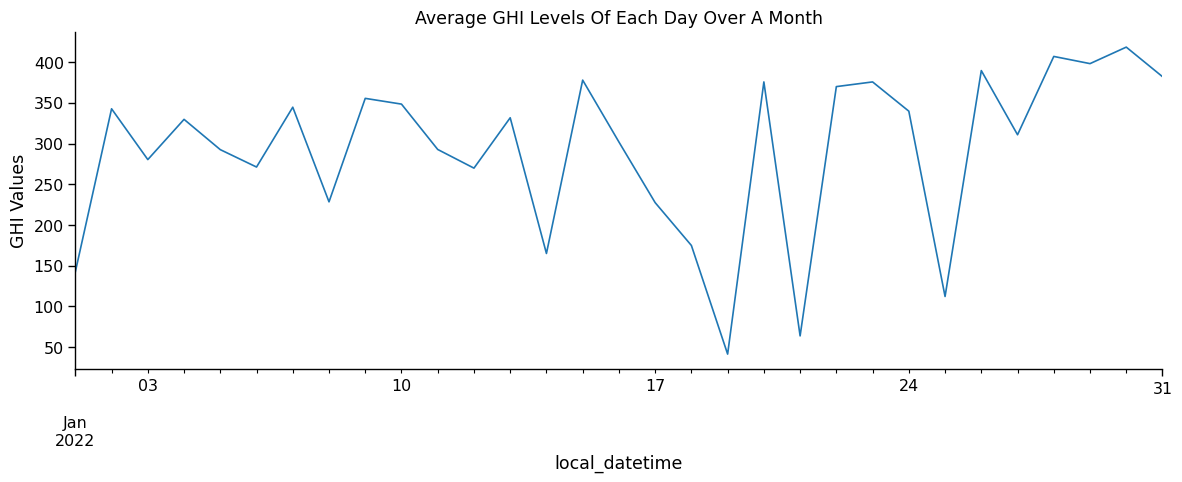

In [59]:
temp_ghi_start = '2022-01-01 00:00:00'
temp_ghi_end = '2022-01-31 23:59:59'

df_month = df_time_ghi[temp_ghi_start:temp_ghi_end]
df_month.index = pd.to_datetime(df_month.index)
df_month_resampled = df_month.resample('D').mean()

df_month_resampled.plot(figsize=(12,5));
plt.title('Average GHI Levels Of Each Day Over A Month')
plt.ylabel('GHI Values')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show()

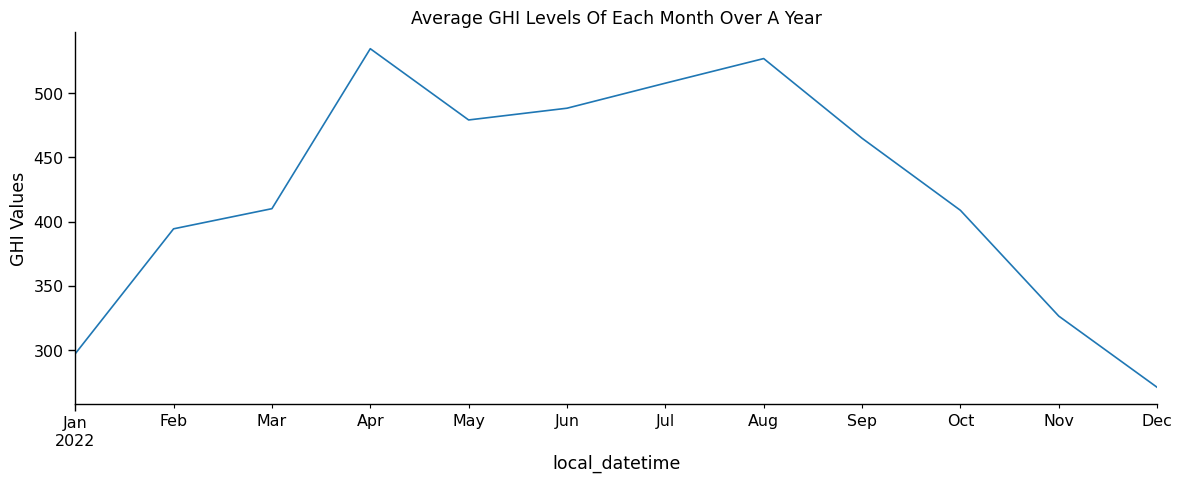

In [39]:
df_Year = df_time_ghi
df_Year.index = pd.to_datetime(df_Year.index)
df_Year_resampled = df_time_ghi.resample('M').mean()

df_Year_resampled.plot(figsize=(12,5));
plt.title('Average GHI Levels Of Each Month Over A Year')
plt.ylabel('GHI Values')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show()

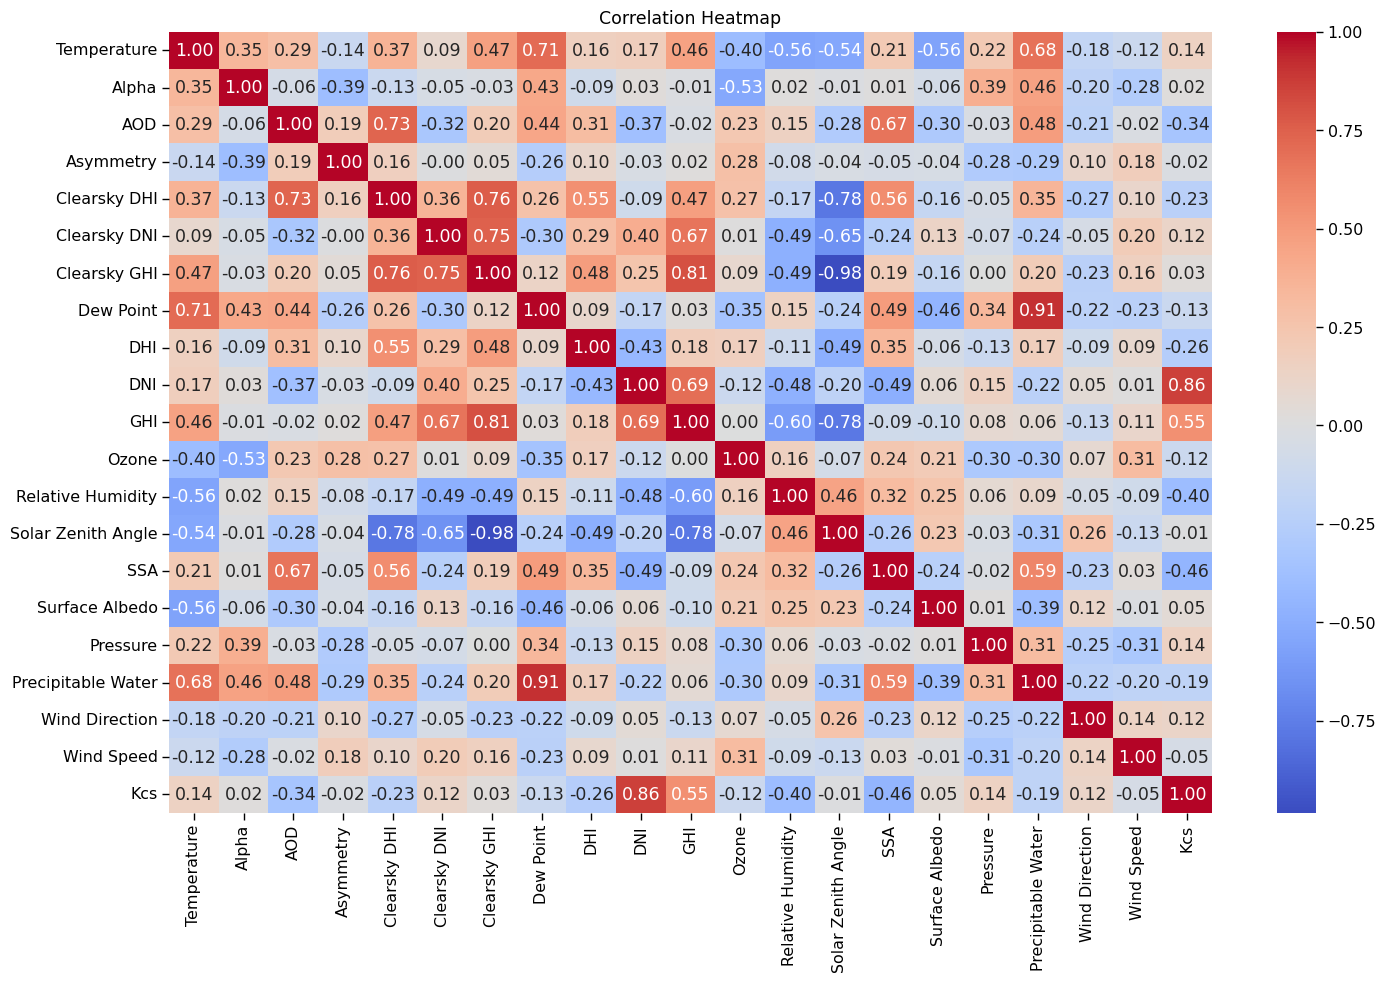

In [61]:
# Drop datetime columns by name
df_no_datetime = data_df.drop(columns=['DateTime', 'local_datetime'])
plt.figure(figsize=(15, 10))
sns.heatmap(df_no_datetime.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'GHI Distribution')

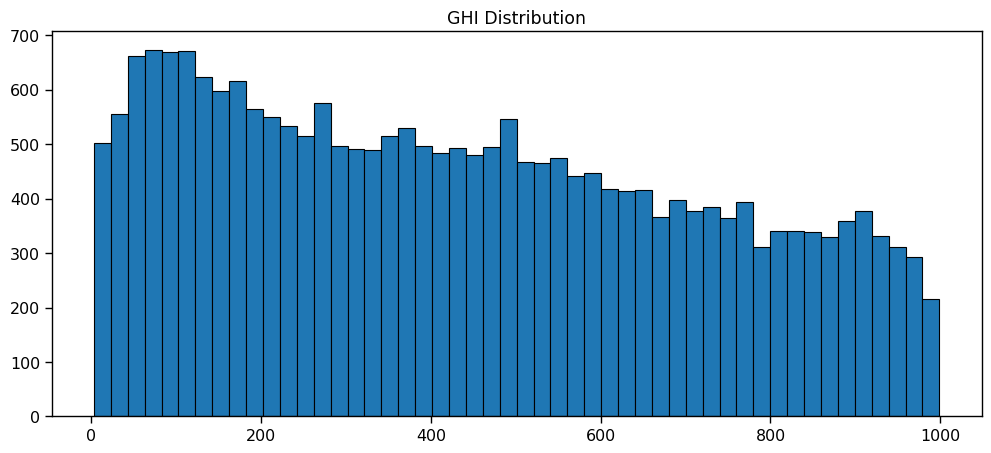

In [41]:
plt.figure(figsize=(12, 5))
data_df['GHI'].hist(bins=50, edgecolor='black', grid=False)
plt.title('GHI Distribution')

,count,mean,std,min,25%,50%,75%,max
GHI,23187.0,437.95532,279.367254,3.0,190.0,413.0,662.0,999.0


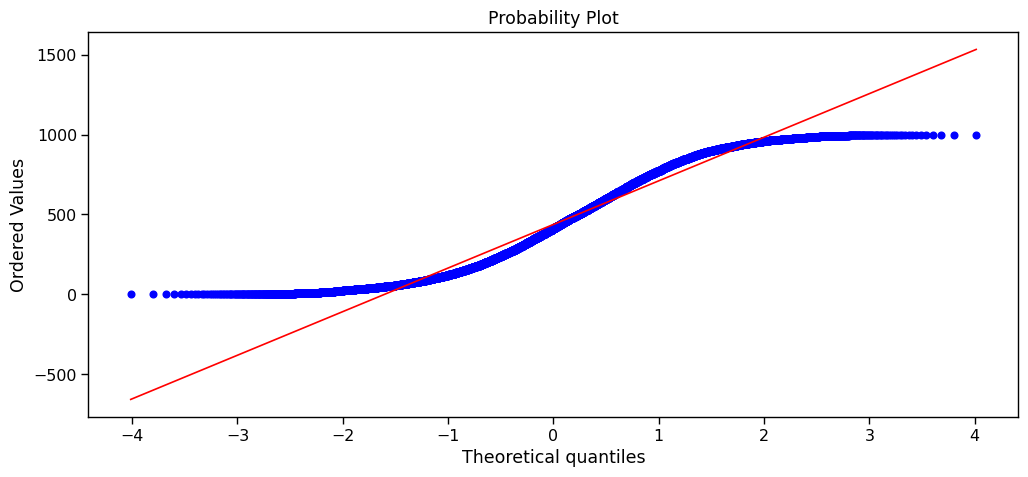

In [42]:
plt.figure(figsize=(12, 5))
stats.probplot(data_df['GHI'], plot=plt);
df_time_ghi.describe().transpose()

In [ ]:
quant = data_df['GHI'].quantile(0.97)
df_quant = data_df[data_df['GHI'] < quant]
df_quant['local_datetime'] = pd.to_datetime(df_quant['local_datetime'])
df_quant['Month'] = df_quant['local_datetime'].dt.month

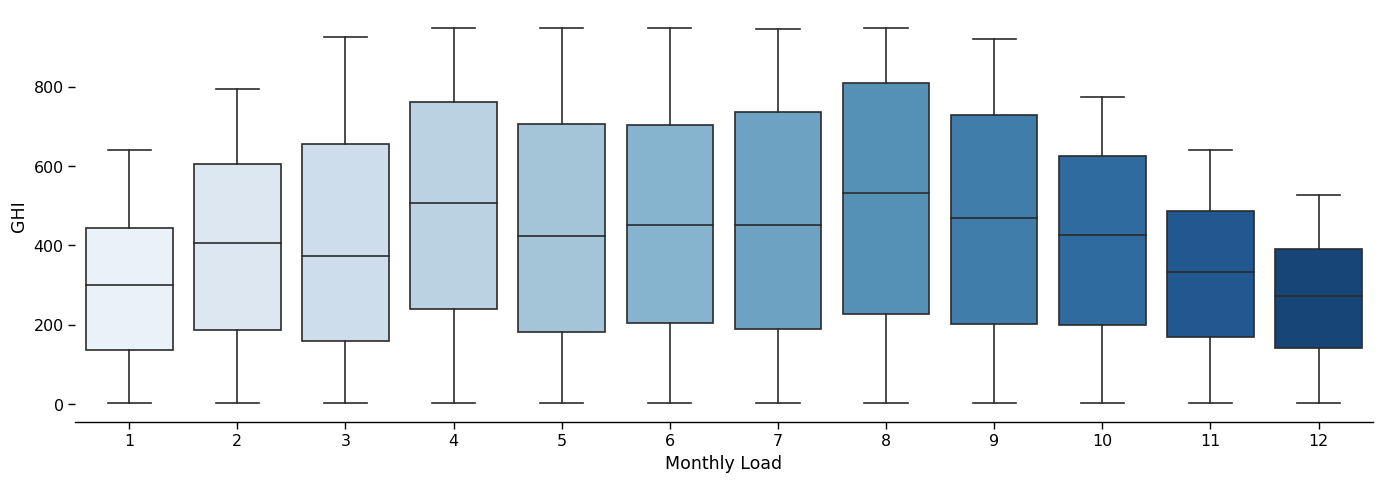

In [47]:
sns.set_context("paper", font_scale=1.3)  
a=plt.figure(figsize=(14,5))
sns.boxplot(x="Month", y="GHI", data=df_quant, palette='Blues');
plt.xlabel('Monthly Load')
sns.despine(left=True);
plt.tight_layout() 

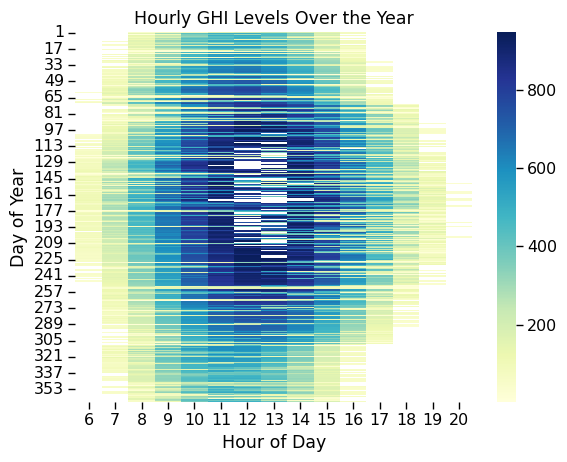

In [48]:
df_quant['DayOfYear'] = df_quant['local_datetime'].dt.dayofyear
df_quant['Hour'] = df_quant['local_datetime'].dt.hour
pivot_table = df_quant.pivot_table(index='DayOfYear', columns='Hour', values='GHI', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', cbar=True)
plt.title('Hourly GHI Levels Over the Year')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Year')
plt.show()

In [49]:
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Add a 'Season' column
df_quant['Season'] = df_quant['local_datetime'].dt.month.apply(assign_season)

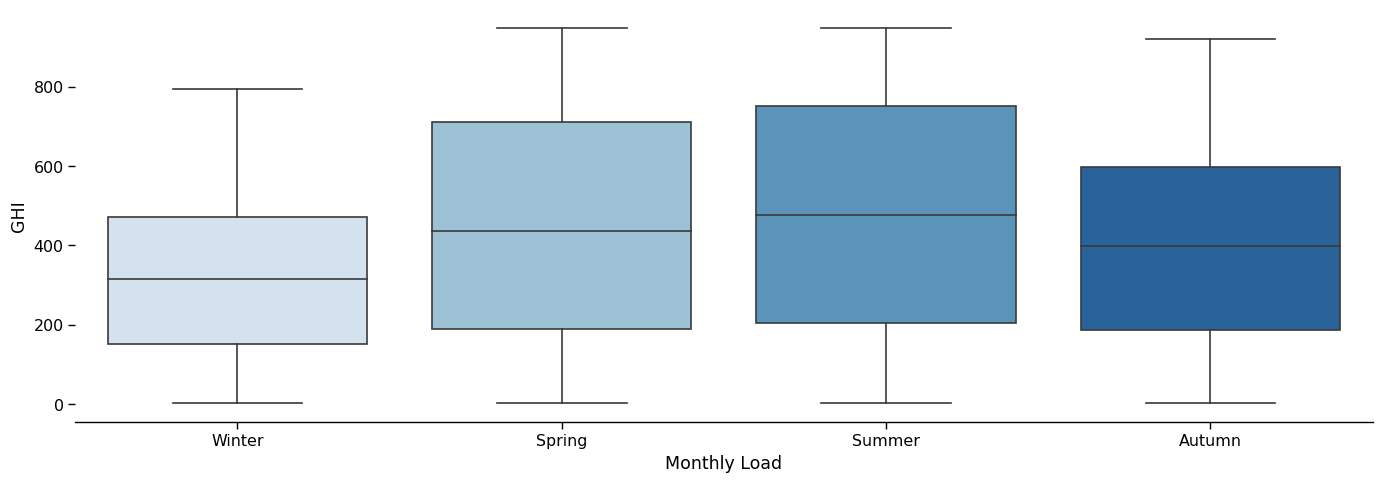

In [51]:
sns.set_context("paper", font_scale=1.3)  
a=plt.figure(figsize=(14,5))
sns.boxplot(x="Season", y="GHI", data=df_quant, palette='Blues');
plt.xlabel('Monthly Load')
sns.despine(left=True);
plt.tight_layout() 